## Data Loading

In [2]:
import numpy as np
import pandas as pd


In [3]:
books = pd.read_csv("Books.csv")
ratings = pd.read_csv("Ratings.csv")
users = pd.read_csv("Users.csv")


C:\Users\Dell\AppData\Local\Temp\ipykernel_12164\2068876136.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv("Books.csv")


In [4]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [6]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


## Data Analysis

In [7]:
print(books.shape)
print(ratings.shape)
print(users.shape)

(271360, 8)
(1149780, 3)
(278858, 3)


In [8]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [9]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [10]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [11]:
books.duplicated().sum()  # no duplicates here

0

In [12]:
users.duplicated().sum()

0

In [13]:
ratings.duplicated().sum()

0

## EXPLORATORY DATA ANALYSIS

In [14]:
books.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271359,271360,271358,271360,271360,271357
unique,271360,242135,102023,202,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,13903,7535,2,2,2


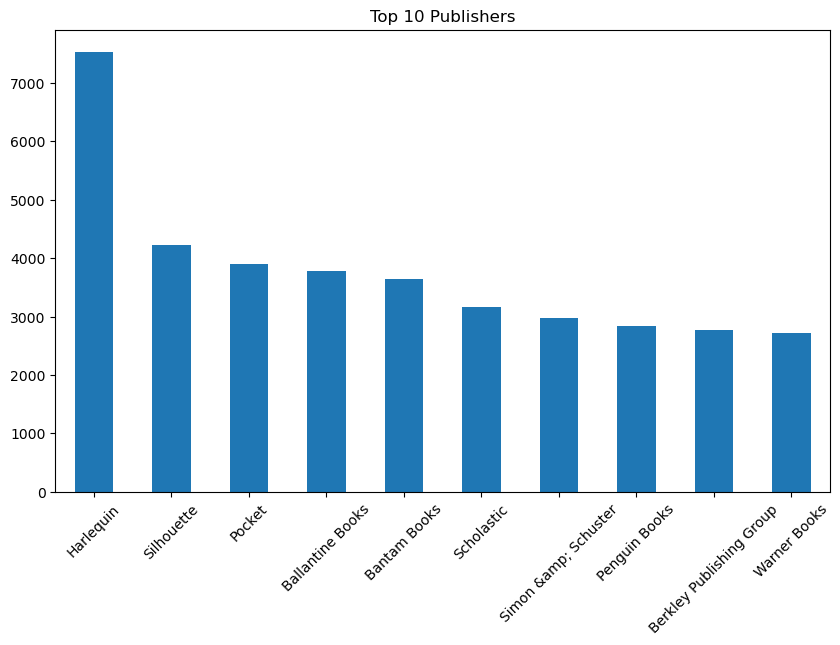

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Publisher distribution
plt.figure(figsize=(10, 6))
books['Publisher'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Publishers')
plt.xticks(rotation=45)
plt.show()

In [16]:
# Handling missing values in the 'Age' column (filling NaN values with the mean age)
mean_age = users['Age'].mean()
users['Age'].fillna(mean_age, inplace=True)


In [17]:
users.isnull().sum()

User-ID     0
Location    0
Age         0
dtype: int64

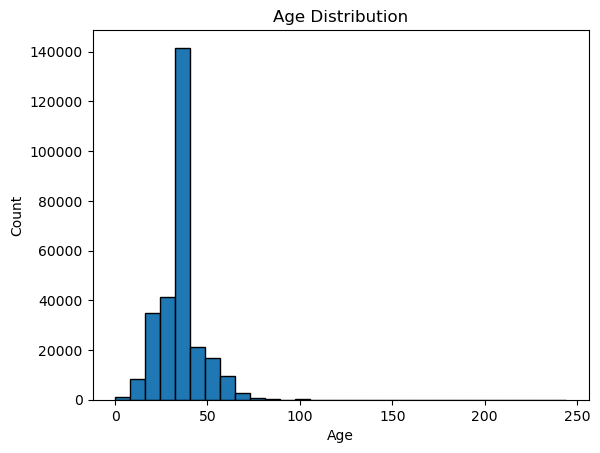

In [18]:
plt.hist(users['Age'].dropna(), bins=30, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

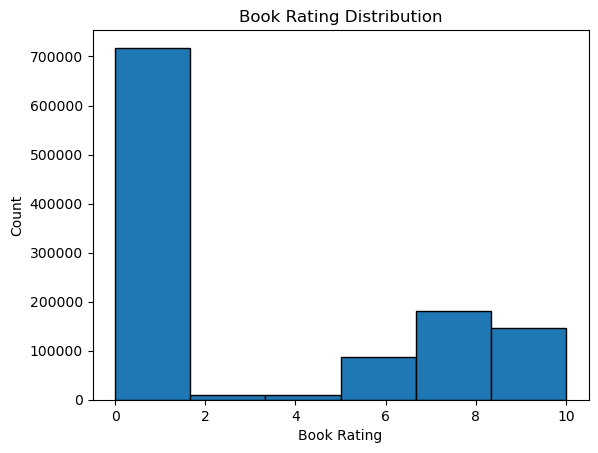

In [19]:
import matplotlib.pyplot as plt

# Distribution of book ratings
plt.hist(ratings['Book-Rating'], bins=6, edgecolor='black', range=[0, 10])
plt.xlabel('Book Rating')
plt.ylabel('Count')
plt.title('Book Rating Distribution')
plt.show()

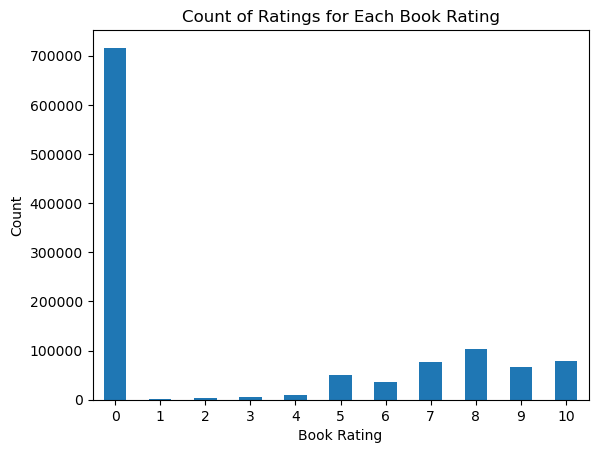

In [20]:
# Count of ratings given to each book
book_rating_counts = ratings['Book-Rating'].value_counts().sort_index()
book_rating_counts.plot(kind='bar', rot=0)
plt.xlabel('Book Rating')
plt.ylabel('Count')
plt.title('Count of Ratings for Each Book Rating')
plt.show()

In [21]:
# User-wise rating distribution
user_rating_counts = ratings.groupby('User-ID')['Book-Rating'].value_counts().unstack().fillna(0)
print(user_rating_counts.head())

Book-Rating    0    1    2    3    4    5    6    7    8    9    10
User-ID                                                            
2             1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
7             1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
8            11.0  0.0  0.0  0.0  0.0  4.0  2.0  1.0  0.0  0.0  0.0
9             2.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
10            1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0


In [22]:
# Most popular books based on ratings
popular_books = ratings.groupby('ISBN')['Book-Rating'].mean().sort_values(ascending=False).head(10)
print(popular_books)

ISBN
0874477050    10.0
561002010     10.0
0590939874    10.0
1570761914    10.0
56500624X     10.0
157076154X    10.0
1570761175    10.0
0373510365    10.0
0393092526    10.0
0590936026    10.0
Name: Book-Rating, dtype: float64


# POPULARITY BASED RECOMMENDATION SYSTEM

In [23]:
# formula used here is - average rating
# whichever books have high average rating will be recommended.
# top 50 books

# Merging books and ratings table with isbn

ratings_books_merge = ratings.merge(books,on = "ISBN")
ratings_books_merge.head()


,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


In [24]:
ratings.merge(books,on = "ISBN").shape

(1031136, 10)

In [25]:
ratings_books_merge.groupby('Book-Title').count()

,User-ID,ISBN,Book-Rating,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
Book-Title,,,,,,,,,
"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",4,4,4,4,4,4,4,4,4
Always Have Popsicles,1,1,1,1,1,1,1,1,1
Apple Magic (The Collector's series),1,1,1,1,1,1,1,1,1
"Ask Lily (Young Women of Faith: Lily Series, Book 5)",1,1,1,1,1,1,1,1,1
Beyond IBM: Leadership Marketing and Finance for the 1990s,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
Ã?Â?lpiraten.,2,2,2,2,2,2,2,2,2
Ã?Â?rger mit Produkt X. Roman.,4,4,4,4,4,4,4,4,4
Ã?Â?sterlich leben.,1,1,1,1,1,1,1,1,1


In [26]:
num_rating_df = ratings_books_merge.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating_df.rename(columns={'Book-Rating':'num_ratings'},inplace= True)
num_rating_df

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [27]:
# average rating
avg_rating_df = ratings_books_merge.groupby('Book-Title').mean()['Book-Rating'].reset_index()
avg_rating_df.rename(columns={'Book-Rating':'avg_ratings'},inplace= True)
avg_rating_df

,Book-Title,avg_ratings
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241066,Ã?Â?lpiraten.,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,5.250000
241068,Ã?Â?sterlich leben.,7.000000
241069,Ã?Â?stlich der Berge.,2.666667


In [28]:
# merging num_rating_df and avg_rating_df

popularity_df = num_rating_df.merge(avg_rating_df,on="Book-Title")
popularity_df

,Book-Title,num_ratings,avg_ratings
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241066,Ã?Â?lpiraten.,2,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241068,Ã?Â?sterlich leben.,1,7.000000
241069,Ã?Â?stlich der Berge.,3,2.666667


In [29]:
# taking only the books which have more than 250 ratings
popularity_df[popularity_df['num_ratings']>=250]

,Book-Title,num_ratings,avg_ratings
764,1984,284,4.454225
818,1st to Die: A Novel,509,3.575639
1048,2nd Chance,356,3.269663
1760,A Bend in the Road,346,3.364162
2281,"A Child Called \It\"": One Child's Courage to S...",265,4.086792
...,...,...,...
233850,White Oleander : A Novel,387,3.506460
233851,White Oleander : A Novel (Oprah's Book Club),356,3.772472
234740,Wicked: The Life and Times of the Wicked Witch...,326,3.766871
234951,Wild Animus,2502,1.019584


In [30]:
popular_df = popularity_df[popularity_df['num_ratings']>=250].sort_values('avg_ratings',ascending=False).head(50)
popular_df

,Book-Title,num_ratings,avg_ratings
80434,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
80422,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
80441,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410
80426,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
80414,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
191612,The Hobbit : The Enchanting Prelude to The Lor...,281,5.007117
187377,The Fellowship of the Ring (The Lord of the Ri...,368,4.948370
80445,Harry Potter and the Sorcerer's Stone (Harry P...,575,4.895652
211384,"The Two Towers (The Lord of the Rings, Part 2)",260,4.880769
219741,To Kill a Mockingbird,510,4.700000


In [31]:
popular_df.merge(books,on='Book-Title')

,Book-Title,num_ratings,avg_ratings,ISBN,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804,0439136350,J. K. Rowling,1999,Scholastic,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...
1,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804,0439136369,J. K. Rowling,2001,Scholastic,http://images.amazon.com/images/P/0439136369.0...,http://images.amazon.com/images/P/0439136369.0...,http://images.amazon.com/images/P/0439136369.0...
2,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804,0786222743,J. K. Rowling,2000,Thorndike Press,http://images.amazon.com/images/P/0786222743.0...,http://images.amazon.com/images/P/0786222743.0...,http://images.amazon.com/images/P/0786222743.0...
3,Harry Potter and the Goblet of Fire (Book 4),387,5.824289,0439139597,J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...
4,Harry Potter and the Goblet of Fire (Book 4),387,5.824289,0439139600,J. K. Rowling,2002,Scholastic Paperbacks,http://images.amazon.com/images/P/0439139600.0...,http://images.amazon.com/images/P/0439139600.0...,http://images.amazon.com/images/P/0439139600.0...
...,...,...,...,...,...,...,...,...,...,...
191,Lord of the Flies,259,3.818533,0698102193,William G. Golding,1978,Putnam Pub Group,http://images.amazon.com/images/P/0698102193.0...,http://images.amazon.com/images/P/0698102193.0...,http://images.amazon.com/images/P/0698102193.0...
192,A Prayer for Owen Meany,413,3.796610,0345361792,John Irving,1990,Ballantine Books,http://images.amazon.com/images/P/0345361792.0...,http://images.amazon.com/images/P/0345361792.0...,http://images.amazon.com/images/P/0345361792.0...
193,A Prayer for Owen Meany,413,3.796610,0345363523,John Irving,1989,Ballantine Books,http://images.amazon.com/images/P/0345363523.0...,http://images.amazon.com/images/P/0345363523.0...,http://images.amazon.com/images/P/0345363523.0...
194,"The Vampire Lestat (Vampire Chronicles, Book II)",301,3.777409,0345313860,ANNE RICE,1986,Ballantine Books,http://images.amazon.com/images/P/0345313860.0...,http://images.amazon.com/images/P/0345313860.0...,http://images.amazon.com/images/P/0345313860.0...


In [32]:
# harry potter duplicate books are there.so drop it
popular_df.merge(books,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Image-URL-M','num_ratings','avg_ratings']]

,Book-Title,Book-Author,Image-URL-M,num_ratings,avg_ratings
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,428,5.852804
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,387,5.824289
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,http://images.amazon.com/images/P/0590353403.0...,278,5.737410
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,347,5.501441
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...,556,5.183453
16,The Hobbit : The Enchanting Prelude to The Lor...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339681.0...,281,5.007117
17,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339703.0...,368,4.948370
26,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,http://images.amazon.com/images/P/059035342X.0...,575,4.895652
28,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339711.0...,260,4.880769
39,To Kill a Mockingbird,Harper Lee,http://images.amazon.com/images/P/0446310786.0...,510,4.700000


In [33]:
popular_df.shape

(50, 3)

# Collaborative Filtering based RS

In [34]:
ratings_books_merge

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...,...,...,...
1031131,276688,0517145553,0,Mostly Harmless,Douglas Adams,1995,Random House Value Pub,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...
1031132,276688,1575660792,7,Gray Matter,Shirley Kennett,1996,Kensington Publishing Corporation,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...
1031133,276690,0590907301,0,Triplet Trouble and the Class Trip (Triplet Tr...,Debbie Dadey,1997,Apple,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...
1031134,276704,0679752714,0,A Desert of Pure Feeling (Vintage Contemporaries),Judith Freeman,1997,Vintage Books USA,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...


In [35]:
# filtering according to the criteria - user > 200 reviews
ratings_books_merge.groupby('User-ID').count()['Book-Rating']

User-ID
2          1
8         17
9          3
10         1
12         1
          ..
278846     1
278849     4
278851    23
278852     1
278854     8
Name: Book-Rating, Length: 92106, dtype: int64

In [36]:
ratings_books_merge.groupby("User-ID").count()['Book-Rating']>200

User-ID
2         False
8         False
9         False
10        False
12        False
          ...  
278846    False
278849    False
278851    False
278852    False
278854    False
Name: Book-Rating, Length: 92106, dtype: bool

In [38]:
x = ratings_books_merge.groupby("User-ID").count()['Book-Rating'] > 200
x[x] # this is a boolean expression which only returns the true values 

User-ID
254       True
2276      True
2766      True
2977      True
3363      True
          ... 
274308    True
275970    True
277427    True
277639    True
278418    True
Name: Book-Rating, Length: 811, dtype: bool

In [40]:
x = ratings_books_merge.groupby("User-ID").count()['Book-Rating'] > 200
experienced_users = x[x].index
experienced_users
# this is ids of the users

Int64Index([   254,   2276,   2766,   2977,   3363,   4017,   4385,   6251,
              6323,   6543,
            ...
            271705, 273979, 274004, 274061, 274301, 274308, 275970, 277427,
            277639, 278418],
           dtype='int64', name='User-ID', length=811)

In [41]:
ratings_books_merge['User-ID'].isin(experienced_users)

0          False
1          False
2           True
3          False
4          False
           ...  
1031131    False
1031132    False
1031133    False
1031134    False
1031135    False
Name: User-ID, Length: 1031136, dtype: bool

In [43]:
filtered_rating = ratings_books_merge[ratings_books_merge['User-ID'].isin(experienced_users)]
filtered_rating

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
5,23768,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
7,28523,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
15,77940,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
16,81977,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...,...,...,...
1030883,275970,1880837927,0,The Theology of the Hammer,Millard Fuller,1994,Smyth &amp; Helwys Publishing,http://images.amazon.com/images/P/1880837927.0...,http://images.amazon.com/images/P/1880837927.0...,http://images.amazon.com/images/P/1880837927.0...
1030884,275970,188717897X,0,The Ordeal of Integration: Progress and Resent...,Orlando Patterson,1998,Civitas Book Publisher,http://images.amazon.com/images/P/188717897X.0...,http://images.amazon.com/images/P/188717897X.0...,http://images.amazon.com/images/P/188717897X.0...
1030885,275970,1888889047,0,Pushcart's Complete Rotten Reviews &amp; Rejec...,Bill Henderson,1998,Pushcart Press,http://images.amazon.com/images/P/1888889047.0...,http://images.amazon.com/images/P/1888889047.0...,http://images.amazon.com/images/P/1888889047.0...
1030886,275970,1931868123,0,There's a Porcupine in My Outhouse: Misadventu...,Mike Tougias,2002,Capital Books (VA),http://images.amazon.com/images/P/1931868123.0...,http://images.amazon.com/images/P/1931868123.0...,http://images.amazon.com/images/P/1931868123.0...


In [45]:
filtered_rating.groupby('Book-Title').count()['Book-Rating']>=50

Book-Title
 A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)    False
 Always Have Popsicles                                                                                        False
 Apple Magic (The Collector's series)                                                                         False
 Beyond IBM: Leadership Marketing and Finance for the 1990s                                                   False
 Clifford Visita El Hospital (Clifford El Gran Perro Colorado)                                                False
                                                                                                              ...  
Ã?Â?ber das Fernsehen.                                                                                        False
Ã?Â?ber die Pflicht zum Ungehorsam gegen den Staat.                                                           False
Ã?Â?lpiraten.                                                

In [48]:
# filtering the books
y = filtered_rating.groupby('Book-Title').count()['Book-Rating']>=50
famous_books = y[y].index
famous_books

Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Day Late and a Dollar Short', 'A Fine Balance',
       ...
       'Winter Solstice', 'Wish You Well', 'Without Remorse',
       'Wizard and Glass (The Dark Tower, Book 4)', 'Wuthering Heights',
       'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='Book-Title', length=706)

In [49]:
filtered_rating['Book-Title'].isin(famous_books)

2          False
5          False
7          False
15         False
16         False
           ...  
1030883    False
1030884    False
1030885    False
1030886    False
1030887    False
Name: Book-Title, Length: 474007, dtype: bool

In [51]:
final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]
final_ratings

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
63,278418,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
65,3363,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
66,7158,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
69,11676,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
74,23768,0446520802,6,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
...,...,...,...,...,...,...,...,...,...,...
1026724,266865,0531001725,10,The Catcher in the Rye,Jerome David Salinger,1973,Scholastic Library Pub,http://images.amazon.com/images/P/0531001725.0...,http://images.amazon.com/images/P/0531001725.0...,http://images.amazon.com/images/P/0531001725.0...
1027923,269566,0670809381,0,Echoes,Maeve Binchy,1986,Penguin USA,http://images.amazon.com/images/P/0670809381.0...,http://images.amazon.com/images/P/0670809381.0...,http://images.amazon.com/images/P/0670809381.0...
1028777,271284,0440910927,0,The Rainmaker,John Grisham,1995,Island,http://images.amazon.com/images/P/0440910927.0...,http://images.amazon.com/images/P/0440910927.0...,http://images.amazon.com/images/P/0440910927.0...
1029070,271705,B0001PIOX4,0,Fahrenheit 451,Ray Bradbury,1993,Simon &amp; Schuster,http://images.amazon.com/images/P/B0001PIOX4.0...,http://images.amazon.com/images/P/B0001PIOX4.0...,http://images.amazon.com/images/P/B0001PIOX4.0...


In [52]:
final_ratings.drop_duplicates()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
63,278418,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
65,3363,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
66,7158,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
69,11676,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
74,23768,0446520802,6,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
...,...,...,...,...,...,...,...,...,...,...
1026724,266865,0531001725,10,The Catcher in the Rye,Jerome David Salinger,1973,Scholastic Library Pub,http://images.amazon.com/images/P/0531001725.0...,http://images.amazon.com/images/P/0531001725.0...,http://images.amazon.com/images/P/0531001725.0...
1027923,269566,0670809381,0,Echoes,Maeve Binchy,1986,Penguin USA,http://images.amazon.com/images/P/0670809381.0...,http://images.amazon.com/images/P/0670809381.0...,http://images.amazon.com/images/P/0670809381.0...
1028777,271284,0440910927,0,The Rainmaker,John Grisham,1995,Island,http://images.amazon.com/images/P/0440910927.0...,http://images.amazon.com/images/P/0440910927.0...,http://images.amazon.com/images/P/0440910927.0...
1029070,271705,B0001PIOX4,0,Fahrenheit 451,Ray Bradbury,1993,Simon &amp; Schuster,http://images.amazon.com/images/P/B0001PIOX4.0...,http://images.amazon.com/images/P/B0001PIOX4.0...,http://images.amazon.com/images/P/B0001PIOX4.0...


In [55]:
# now we have to create a pivot table -
# users as the columns , books as the rows and ratings inside the cells
pt = final_ratings.pivot_table(index = "Book-Title",columns = "User-ID",values = 'Book-Rating')
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Bend in the Road,0.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,9.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [56]:
# filling nan as 0
pt.fillna(0,inplace=True)
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
from sklearn.metrics.pairwise import cosine_similarity

In [59]:
similarity_score = cosine_similarity(pt)
similarity_score

array([[1.        , 0.10255025, 0.01220856, ..., 0.12110367, 0.07347567,
        0.04316046],
       [0.10255025, 1.        , 0.2364573 , ..., 0.07446129, 0.16773875,
        0.14263397],
       [0.01220856, 0.2364573 , 1.        , ..., 0.04558758, 0.04938579,
        0.10796119],
       ...,
       [0.12110367, 0.07446129, 0.04558758, ..., 1.        , 0.07085128,
        0.0196177 ],
       [0.07347567, 0.16773875, 0.04938579, ..., 0.07085128, 1.        ,
        0.10602962],
       [0.04316046, 0.14263397, 0.10796119, ..., 0.0196177 , 0.10602962,
        1.        ]])

In [60]:
similarity_score.shape

(706, 706)

In [61]:
# the below shows the book 1 i.e '1984' book's similarity distance with the rest of the books i.e 706 books present in tje pv
# this array 0 indiactes the book 1.
similarity_score[0]
# likewise it does for each and every book

array([1.        , 0.10255025, 0.01220856, 0.        , 0.05367224,
       0.02774901, 0.08216491, 0.13732869, 0.03261686, 0.03667591,
       0.02322418, 0.06766487, 0.02083978, 0.09673735, 0.13388865,
       0.08303112, 0.11153543, 0.05100411, 0.02517784, 0.11706383,
       0.        , 0.14333793, 0.07847534, 0.06150451, 0.08723968,
       0.        , 0.07009814, 0.13658681, 0.07600328, 0.12167134,
       0.00768046, 0.01473221, 0.        , 0.07965814, 0.04522617,
       0.01556271, 0.09495938, 0.0182307 , 0.02610465, 0.07984012,
       0.11679969, 0.0569124 , 0.08354155, 0.08471898, 0.08785938,
       0.05491435, 0.0548505 , 0.27026514, 0.09779123, 0.06016046,
       0.08958835, 0.06748675, 0.        , 0.04468098, 0.01920872,
       0.        , 0.05629067, 0.00557964, 0.07877059, 0.05219479,
       0.18908177, 0.        , 0.01240656, 0.02984572, 0.04279502,
       0.12680125, 0.16566735, 0.        , 0.13357242, 0.06615478,
       0.        , 0.        , 0.        , 0.10968075, 0.02806

In [82]:
def recommend(book_name):
    # index fetch - book 
    index = np.where(pt.index == book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_score[index])),key = lambda x:x[1],reverse = True)[1:6]
    # we need the most similar ones 
    # so we can do - enumerate - which will show the index awa the values
    # eg are listed below
    for i in similar_items:
        print(pt.index[i[0]])

        

In [83]:
# this book is a romantic novel - the below output is also similar to it - romantic nocels based on rating
recommend("The Notebook")

A Walk to Remember
The Rescue
One Door Away from Heaven
Toxin
The Five People You Meet in Heaven


In [84]:
recommend("Message in a Bottle")

Nights in Rodanthe
The Mulberry Tree
A Walk to Remember
River's End
Nightmares &amp; Dreamscapes


In [85]:
# political book
recommend("Animal Farm")

1984
Angus, Thongs and Full-Frontal Snogging: Confessions of Georgia Nicolson
Midnight
Second Nature
Call of the Wild


In [86]:
recommend("The Da Vinci Code")

Angels &amp; Demons
Touching Evil
Saving Faith
The Sweet Potato Queens' Book of Love
Middlesex: A Novel


In [88]:
recommend("Harry Potter and the Chamber of Secrets (Book 2)")

Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
Harry Potter and the Sorcerer's Stone (Book 1)
Harry Potter and the Order of the Phoenix (Book 5)


In [75]:
pt.index

Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Day Late and a Dollar Short', 'A Fine Balance',
       ...
       'Winter Solstice', 'Wish You Well', 'Without Remorse',
       'Wizard and Glass (The Dark Tower, Book 4)', 'Wuthering Heights',
       'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='Book-Title', length=706)

In [74]:
recommend('1984')

47
545
82
634
551


In [77]:
pt.index[47]

'Animal Farm'

In [62]:
np.where(pt.index == "1984")

(array([0], dtype=int64),)

In [63]:
np.where(pt.index == "1984")[0][0]

0

In [64]:
np.where(pt.index == "4 Blondes")[0][0]

3

In [66]:
list(enumerate(similarity_score[0]))
# the book 1's similarity score with the rest of the books is listed below


[(0, 0.9999999999999998),
 (1, 0.10255024829874465),
 (2, 0.012208555646509366),
 (3, 0.0),
 (4, 0.053672244225442485),
 (5, 0.027749013024662858),
 (6, 0.08216491130000354),
 (7, 0.13732869060263378),
 (8, 0.03261686350494277),
 (9, 0.03667590746512177),
 (10, 0.02322418425912186),
 (11, 0.06766486753662343),
 (12, 0.020839782065795794),
 (13, 0.09673734976610586),
 (14, 0.13388864701187034),
 (15, 0.08303111691811028),
 (16, 0.1115354275858341),
 (17, 0.051004105100675136),
 (18, 0.025177841632809915),
 (19, 0.11706383185253948),
 (20, 0.0),
 (21, 0.14333792815336935),
 (22, 0.07847534327232125),
 (23, 0.06150451339525138),
 (24, 0.08723968326958673),
 (25, 0.0),
 (26, 0.07009814362931202),
 (27, 0.13658680855472938),
 (28, 0.07600327535501016),
 (29, 0.12167133598776537),
 (30, 0.007680459111722776),
 (31, 0.01473221255132234),
 (32, 0.0),
 (33, 0.07965814289647455),
 (34, 0.04522616573040869),
 (35, 0.01556270914112474),
 (36, 0.09495937740802214),
 (37, 0.018230696811058135),
 (38

In [69]:
# sort the values - similar items
sorted(list(enumerate(similarity_score[0])),key = lambda x:x[1],reverse = True)

[(0, 0.9999999999999998),
 (47, 0.2702651417103732),
 (545, 0.2639619371123496),
 (82, 0.2366937434740099),
 (634, 0.23299389358170397),
 (551, 0.2262639743141286),
 (181, 0.22222254415660225),
 (500, 0.21057743765309012),
 (344, 0.20675540390454),
 (554, 0.20025063706783053),
 (520, 0.19972624710300058),
 (527, 0.19656287691544355),
 (488, 0.19511819825564608),
 (552, 0.1920889620576415),
 (318, 0.19182230688281934),
 (624, 0.18925313707609975),
 (598, 0.18921367782346202),
 (60, 0.18908176672188648),
 (622, 0.18571699439818884),
 (647, 0.1841081817659337),
 (546, 0.18408910419891056),
 (202, 0.18049207281616433),
 (541, 0.17990898085771032),
 (309, 0.17415730924332484),
 (588, 0.1738182944100774),
 (537, 0.17008719986228352),
 (544, 0.1672877700938274),
 (66, 0.16566734565340113),
 (118, 0.165272766123669),
 (269, 0.1650329228149958),
 (354, 0.16337845332530374),
 (476, 0.16104067376144765),
 (407, 0.16041182196659062),
 (590, 0.16000267935045498),
 (666, 0.1589387141616799),
 (92, 0

In [70]:
# we dont want the first since it is the same bok with itself
# output is the similar items 
sorted(list(enumerate(similarity_score[0])),key = lambda x:x[1],reverse = True)[1:6]

[(47, 0.2702651417103732),
 (545, 0.2639619371123496),
 (82, 0.2366937434740099),
 (634, 0.23299389358170397),
 (551, 0.2262639743141286)]